In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [8]:
# load the data from the CSV file
data = pd.read_csv('dataset.csv')

# drop the ID column
data = data.drop('id', axis=1)

# separate the features and target variable
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# convert the target variable to numeric values
y = pd.Series(np.where(y.values == 'M', 1, 0), y.index)

In [9]:
# Lets get an idea on how the data looks like
print(data.shape)
print(data.head())
print(data.tail())
print(data.info())
print(data.isnull().sum())


(569, 31)
  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         B        12.32         12.39           78.85      464.1   
1         B        10.60         18.95           69.28      346.4   
2         B        11.04         16.83           70.92      373.2   
3         B        11.28         13.39           73.00      384.8   
4         B        15.19         13.21           97.65      711.8   

   smoothness_mean  compactness_mean  concavity_mean  points_mean  \
0          0.10280           0.06981         0.03987      0.03700   
1          0.09688           0.11470         0.06387      0.02642   
2          0.10770           0.07804         0.03046      0.02480   
3          0.11640           0.11360         0.04635      0.04796   
4          0.07963           0.06934         0.03393      0.02657   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1959  ...         13.50          15.64            86.97   
1         0.1922  

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  points_mean  \
count       569.000000        569.000000      569.000000   569.000000   
mean          0.096360          0.104341        0.088799     0.048919   
std           0.014064          0.052813        0.079720     0.038803   
min           0.052630          0.019380        0.000000     0.000000   
25%           0.086370          0.064920        0

<AxesSubplot:xlabel='radius_mean'>

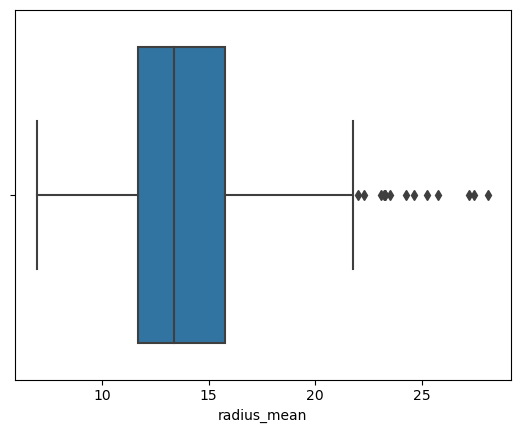

In [21]:
#Summary or Distribution of each variable in dataset
print(data.describe())

sns.boxplot(x='radius_mean', data=data)



<AxesSubplot:xlabel='area_mean', ylabel='perimeter_mean'>

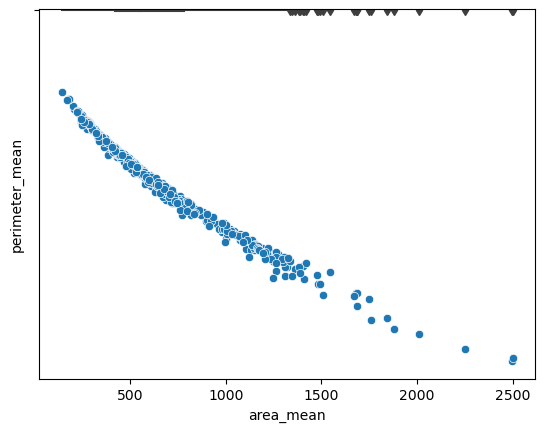

In [31]:
#lets look for outliers
sns.boxplot(x='area_mean', data=data)
sns.scatterplot(x='area_mean', y='perimeter_mean', data=data)


                   radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean           1.000000      0.323782        0.997855   0.987357   
texture_mean          0.323782      1.000000        0.329533   0.321086   
perimeter_mean        0.997855      0.329533        1.000000   0.986507   
area_mean             0.987357      0.321086        0.986507   1.000000   
smoothness_mean       0.170581     -0.023389        0.207278   0.177028   
compactness_mean      0.506124      0.236702        0.556936   0.498502   
concavity_mean        0.676764      0.302418        0.716136   0.685983   
points_mean           0.822529      0.293464        0.850977   0.823269   
symmetry_mean         0.147741      0.071401        0.183027   0.151293   
dimension_mean       -0.311631     -0.076437       -0.261477  -0.283110   
radius_se             0.679090      0.275869        0.691765   0.732562   
texture_se           -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se          0.6

<AxesSubplot:>

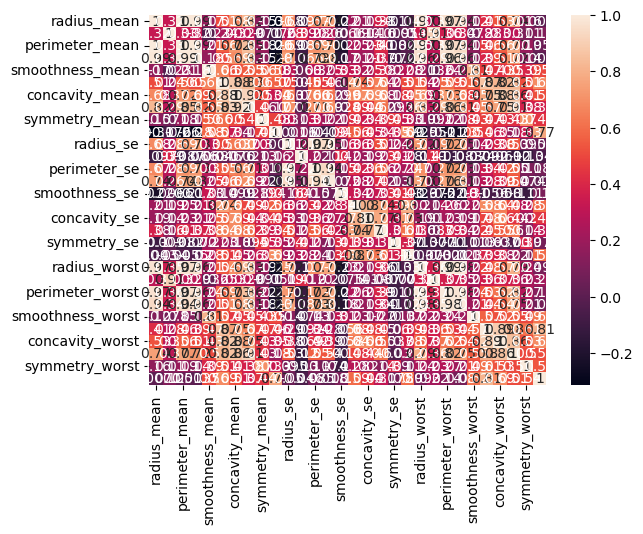

In [12]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)


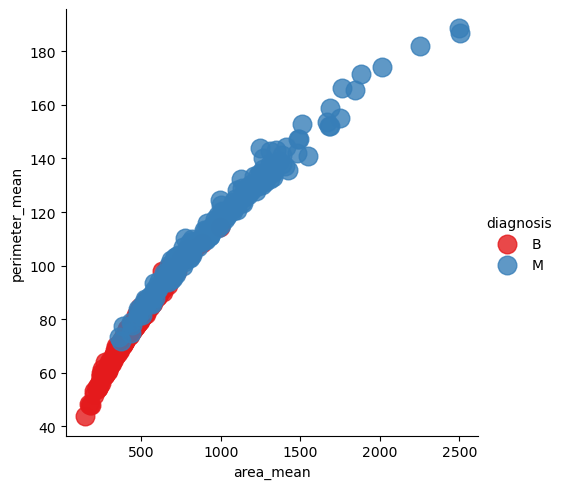

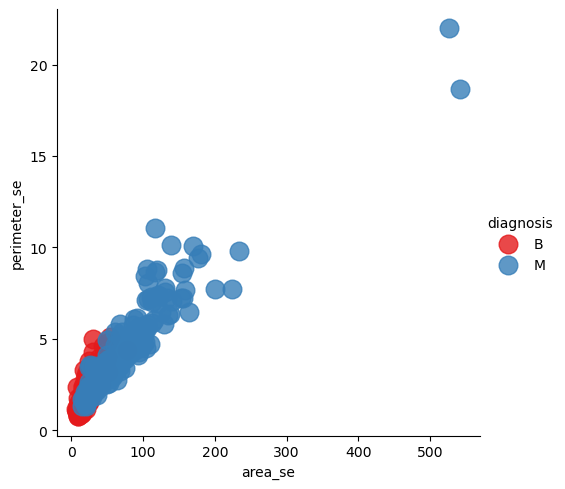

In [30]:
#plot our data
sns.lmplot(x='area_mean' , y='perimeter_mean', data=data, hue='diagnosis',
          palette='Set1', fit_reg=False, scatter_kws={"s":180});
sns.lmplot(x='area_se' , y='perimeter_se', data=data, hue='diagnosis',
          palette='Set1', fit_reg=False, scatter_kws={"s":180});

# Observation:

1. Malignant- For Malignant, we can see that area and perimeter of the cell are
   high.

2. Benign- For Benign, we can see that area and perimeter of the cell are          comparitively less to malignant.

   Therefore, this means that Malignant is a serious stage of cancer where tissues are damaged more. So prediction of diagnosis maybe from the area and perimeter of cell

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# evaluate each model using cross-validation
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f'{name}: {np.mean(scores):.4f} ({np.std(scores):.4f})')


Decision Tree: 0.9156 (0.0152)
Random Forest: 0.9543 (0.0102)
K-Nearest Neighbors: 0.9368 (0.0186)


In [14]:
# use grid search to find the best hyperparameters for the random forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X, y)

print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_:.4f}')


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9631


In [15]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the random forest model with the best hyperparameters
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300)
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')


Test accuracy: 0.9561
